In [191]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pyLDAvis
import pyLDAvis.gensim_models;

In [176]:
#fo = pd.read_csv('clean_File.csv') #read the data
df = pd.read_csv('data/text-preprocessing.csv') #create data frame
df = df.drop(columns=['Unnamed: 0'])
df.head()

,tweet_id,author_name,author_username,author_location,content,content_clean,like_count,retweet_count,reply_count,source,...,latitude,province,city,country,created_at,content_token,tweet_tokens_fdist,tweet_tokens_WSW,tweet_tokens_stemmed,tweet_tokens_stemmed_string
0,153619597713608704,MariBerlomba,MariBerlomba,di dalam asa pemuda,"1. lomba poster ilmiah ""energi baru/terbarukan...",lomba poster ilmiah energi baru terbarukan dea...,0.0,1.0,NaN,Twitter for BlackBerry®,...,NaN,NaN,NaN,NaN,2012-01-01 23:32:20,"['lomba', 'poster', 'ilmiah', 'energi', 'baru'...",<FreqDist with 13 samples and 13 outcomes>,"['lomba', 'poster', 'ilmiah', 'energi', 'terba...","['lomba', 'poster', 'ilmiah', 'energi', 'baru'...",lomba poster ilmiah energi baru deadline janua...
1,153857491925610496,vegaaulia,vegaaulia,"Bogor, Indonesia",elaahhh ini si bapak tiba2 ngomong soal energi...,elaahhh ini si bapak tiba ngomong soal energi ...,0.0,NaN,1.0,Mobile Web,...,-6.596299,Jawa Barat,Kelurahan Pabaton,Indonesia,2012-01-02 15:17:39,"['elaahhh', 'ini', 'si', 'bapak', 'tiba', 'ngo...",<FreqDist with 13 samples and 13 outcomes>,"['elaahhh', 'ngomong', 'energi', 'terbarukan',...","['elaahhh', 'ngomong', 'energi', 'baru', 'tv',...",elaahhh ngomong energi baru tv biruu
2,154361424154603520,enbater,enbater,Indonesia,masih banyak daerah terpencil membutuhkam list...,masih banyak daerah terpencil membutuhkam list...,0.0,NaN,NaN,MOTOBLUR,...,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-04 00:40:06,"['masih', 'banyak', 'daerah', 'terpencil', 'me...",<FreqDist with 13 samples and 13 outcomes>,"['daerah', 'terpencil', 'membutuhkam', 'listri...","['daerah', 'pencil', 'membutuhkam', 'listrik',...",daerah pencil membutuhkam listrik manfaat ener...
3,156397219346518017,imronrosidin,imronrosidin,"ÜT: -6.895087,107.627799",gw kira kalo @provocactive gak tertarik dgn ma...,gw kira kalo gak tertarik dgn materi energi ba...,0.0,NaN,1.0,UberSocial for BlackBerry,...,NaN,NaN,NaN,NaN,2012-01-09 15:29:37,"['gw', 'kira', 'kalo', 'gak', 'tertarik', 'dgn...",<FreqDist with 18 samples and 18 outcomes>,"['tertarik', 'materi', 'energi', 'terbarukan',...","['tarik', 'materi', 'energi', 'baru', 'baek', ...",tarik materi energi baru baek ganti nama propa...
4,156936339718279168,revozone,revozone,Indonesia,satu lagi yang aneh. inget jatropa? alias miny...,satu lagi yang aneh inget jatropa alias minyak...,0.0,NaN,NaN,UberSocial for BlackBerry,...,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-11 03:11:53,"['satu', 'lagi', 'yang', 'aneh', 'inget', 'jat...",<FreqDist with 20 samples and 21 outcomes>,"['aneh', 'inget', 'jatropa', 'alias', 'minyak'...","['aneh', 'inget', 'jatropa', 'alias', 'minyak'...",aneh inget jatropa alias minyak jarak bbrp jat...


In [177]:
df.shape

(109705, 23)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109705 entries, 0 to 109704
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tweet_id                     109705 non-null  int64  
 1   author_name                  109705 non-null  object 
 2   author_username              109705 non-null  object 
 3   author_location              78272 non-null   object 
 4   content                      109705 non-null  object 
 5   content_clean                109437 non-null  object 
 6   like_count                   109604 non-null  float64
 7   retweet_count                17012 non-null   float64
 8   reply_count                  16620 non-null   float64
 9   source                       109705 non-null  object 
 10  keyword                      109705 non-null  object 
 11  address                      64928 non-null   object 
 12  longitude                    66438 non-null   float64
 13 

In [179]:
df_new = df[df['content_clean'].notnull()]
df_new['tweet_tokens_stemmed_string'] = df_new['tweet_tokens_stemmed_string'].astype(str)

In [180]:
text = df_new['tweet_tokens_stemmed_string']
text_list =  [i.split() for i in text]
print(len(text_list))

109437


In [181]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [182]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<16355 unique tokens: ['deadline', 'derajat', 'ilmiah', 'januari', 'lomba']...>


In [183]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

109437
[(35, 1), (188, 1)]


In [184]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

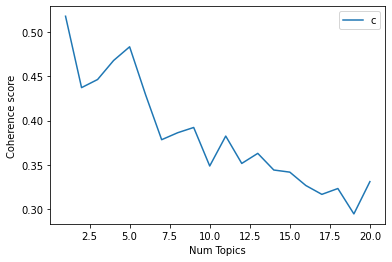

In [185]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [186]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.518
Num Topics = 2  has Coherence Value of 0.437
Num Topics = 3  has Coherence Value of 0.446
Num Topics = 4  has Coherence Value of 0.468
Num Topics = 5  has Coherence Value of 0.483
Num Topics = 6  has Coherence Value of 0.429
Num Topics = 7  has Coherence Value of 0.378
Num Topics = 8  has Coherence Value of 0.386
Num Topics = 9  has Coherence Value of 0.392
Num Topics = 10  has Coherence Value of 0.349
Num Topics = 11  has Coherence Value of 0.383
Num Topics = 12  has Coherence Value of 0.352
Num Topics = 13  has Coherence Value of 0.363
Num Topics = 14  has Coherence Value of 0.344
Num Topics = 15  has Coherence Value of 0.342
Num Topics = 16  has Coherence Value of 0.327
Num Topics = 17  has Coherence Value of 0.317
Num Topics = 18  has Coherence Value of 0.323
Num Topics = 19  has Coherence Value of 0.295
Num Topics = 20  has Coherence Value of 0.331


In [193]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=2) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    # yg belum remove Yang, yg,trus lower text

Topic: 0 Word: 0.012*"pln" + 0.009*"kembang" + 0.008*"bangkit_listrik" + 0.008*"bangkit" + 0.008*"indonesia" + 0.008*"listrik" + 0.006*"menteri_esdm" + 0.006*"target" + 0.006*"capai_target" + 0.006*"transisi"
Topic: 1 Word: 0.034*"pln_id" + 0.010*"ruu" + 0.009*"id" + 0.005*"bahan_bakar" + 0.004*"net_zero" + 0.004*"pln" + 0.004*"renewable_energy" + 0.004*"capai_persen" + 0.004*"mobil_listrik" + 0.004*"kuat_bidang"


In [194]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 5)]) #ubah2 yg ini
    print(top_words_per_topic)

# df=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_topic_20.csv")


[(0, 'pln', 0.011541791), (0, 'kembang', 0.008896562), (0, 'bangkit_listrik', 0.008425842), (0, 'bangkit', 0.008364869), (0, 'indonesia', 0.008355142)]
[(0, 'pln', 0.011541791), (0, 'kembang', 0.008896562), (0, 'bangkit_listrik', 0.008425842), (0, 'bangkit', 0.008364869), (0, 'indonesia', 0.008355142), (1, 'pln_id', 0.03402858), (1, 'ruu', 0.0097298045), (1, 'id', 0.008525109), (1, 'bahan_bakar', 0.0045971153), (1, 'net_zero', 0.0044351364)]


In [195]:
model.num_topics

2

In [196]:
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'data/lda-gensim_clean_kualitatif1.html')

PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
0      0.19774  0.0       1        1  57.159353
1     -0.19774  0.0       2        1  42.840647, topic_info=                  Term         Freq        Total Category  logprob  loglift
7140            pln_id  4051.000000  4051.000000  Default  30.0000  30.0000
3362               ruu  1162.000000  1162.000000  Default  29.0000  29.0000
783    bangkit_listrik  1309.000000  1309.000000  Default  28.0000  28.0000
530            bangkit  1301.000000  1301.000000  Default  27.0000  27.0000
16             listrik  1241.000000  1241.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
16341  inggris_sepakat   289.481229   344.308464   Topic2  -5.9968   0.6742
230              green   287.976914   352.180047   Topic2  -6.0020   0.6464
150                pln   504.102782  2296.846262   Topic2  -5.4421  -0.6688
16196

In [197]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
0     -60.312317  141.369629       1        1  57.159326
1      60.312561 -141.369141       2        1  42.840674, topic_info=                  Term         Freq        Total Category  logprob  loglift
7140            pln_id  4051.000000  4051.000000  Default  30.0000  30.0000
3362               ruu  1162.000000  1162.000000  Default  29.0000  29.0000
783    bangkit_listrik  1309.000000  1309.000000  Default  28.0000  28.0000
530            bangkit  1301.000000  1301.000000  Default  27.0000  27.0000
16             listrik  1241.000000  1241.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
16341  inggris_sepakat   289.481412   344.308621   Topic2  -5.9968   0.6742
230              green   287.977095   352.180198   Topic2  -6.0020   0.6464
150                pln   504.103100  2296.845733   Topic2  -5.4421  -0.6688
16196      simak_bawah   273.959945   418.371753   Topic2  -6.0519   0.4243
169              bahas   240.773634   355.647297   Topic2  -6.1811   0.4576

[144 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
1323       1  0.024055    airlangga
1323       2  0.974248    airlangga
11838      2  0.997448          ako
1640       2  0.996425          ana
8000       1  0.008648  anggota_dpr
...      ...       ...          ...
10535      2  0.985524    udien_pln
54         1  0.991128        usaha
54         2  0.010566        usaha
658        1  0.011826          vii
658        2  0.993399          vii

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])